In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import time
import requests

%matplotlib inline

In [2]:
from pylab import rcParams
from nltk.tokenize import RegexpTokenizer
from bs4 import BeautifulSoup
from time import sleep
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 15
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

11946
   tagID           tagValue
0      1              metal
1      2  alternative metal
2      3          goth rock
3      4        black metal
4      5        death metal
<type 'numpy.int64'>


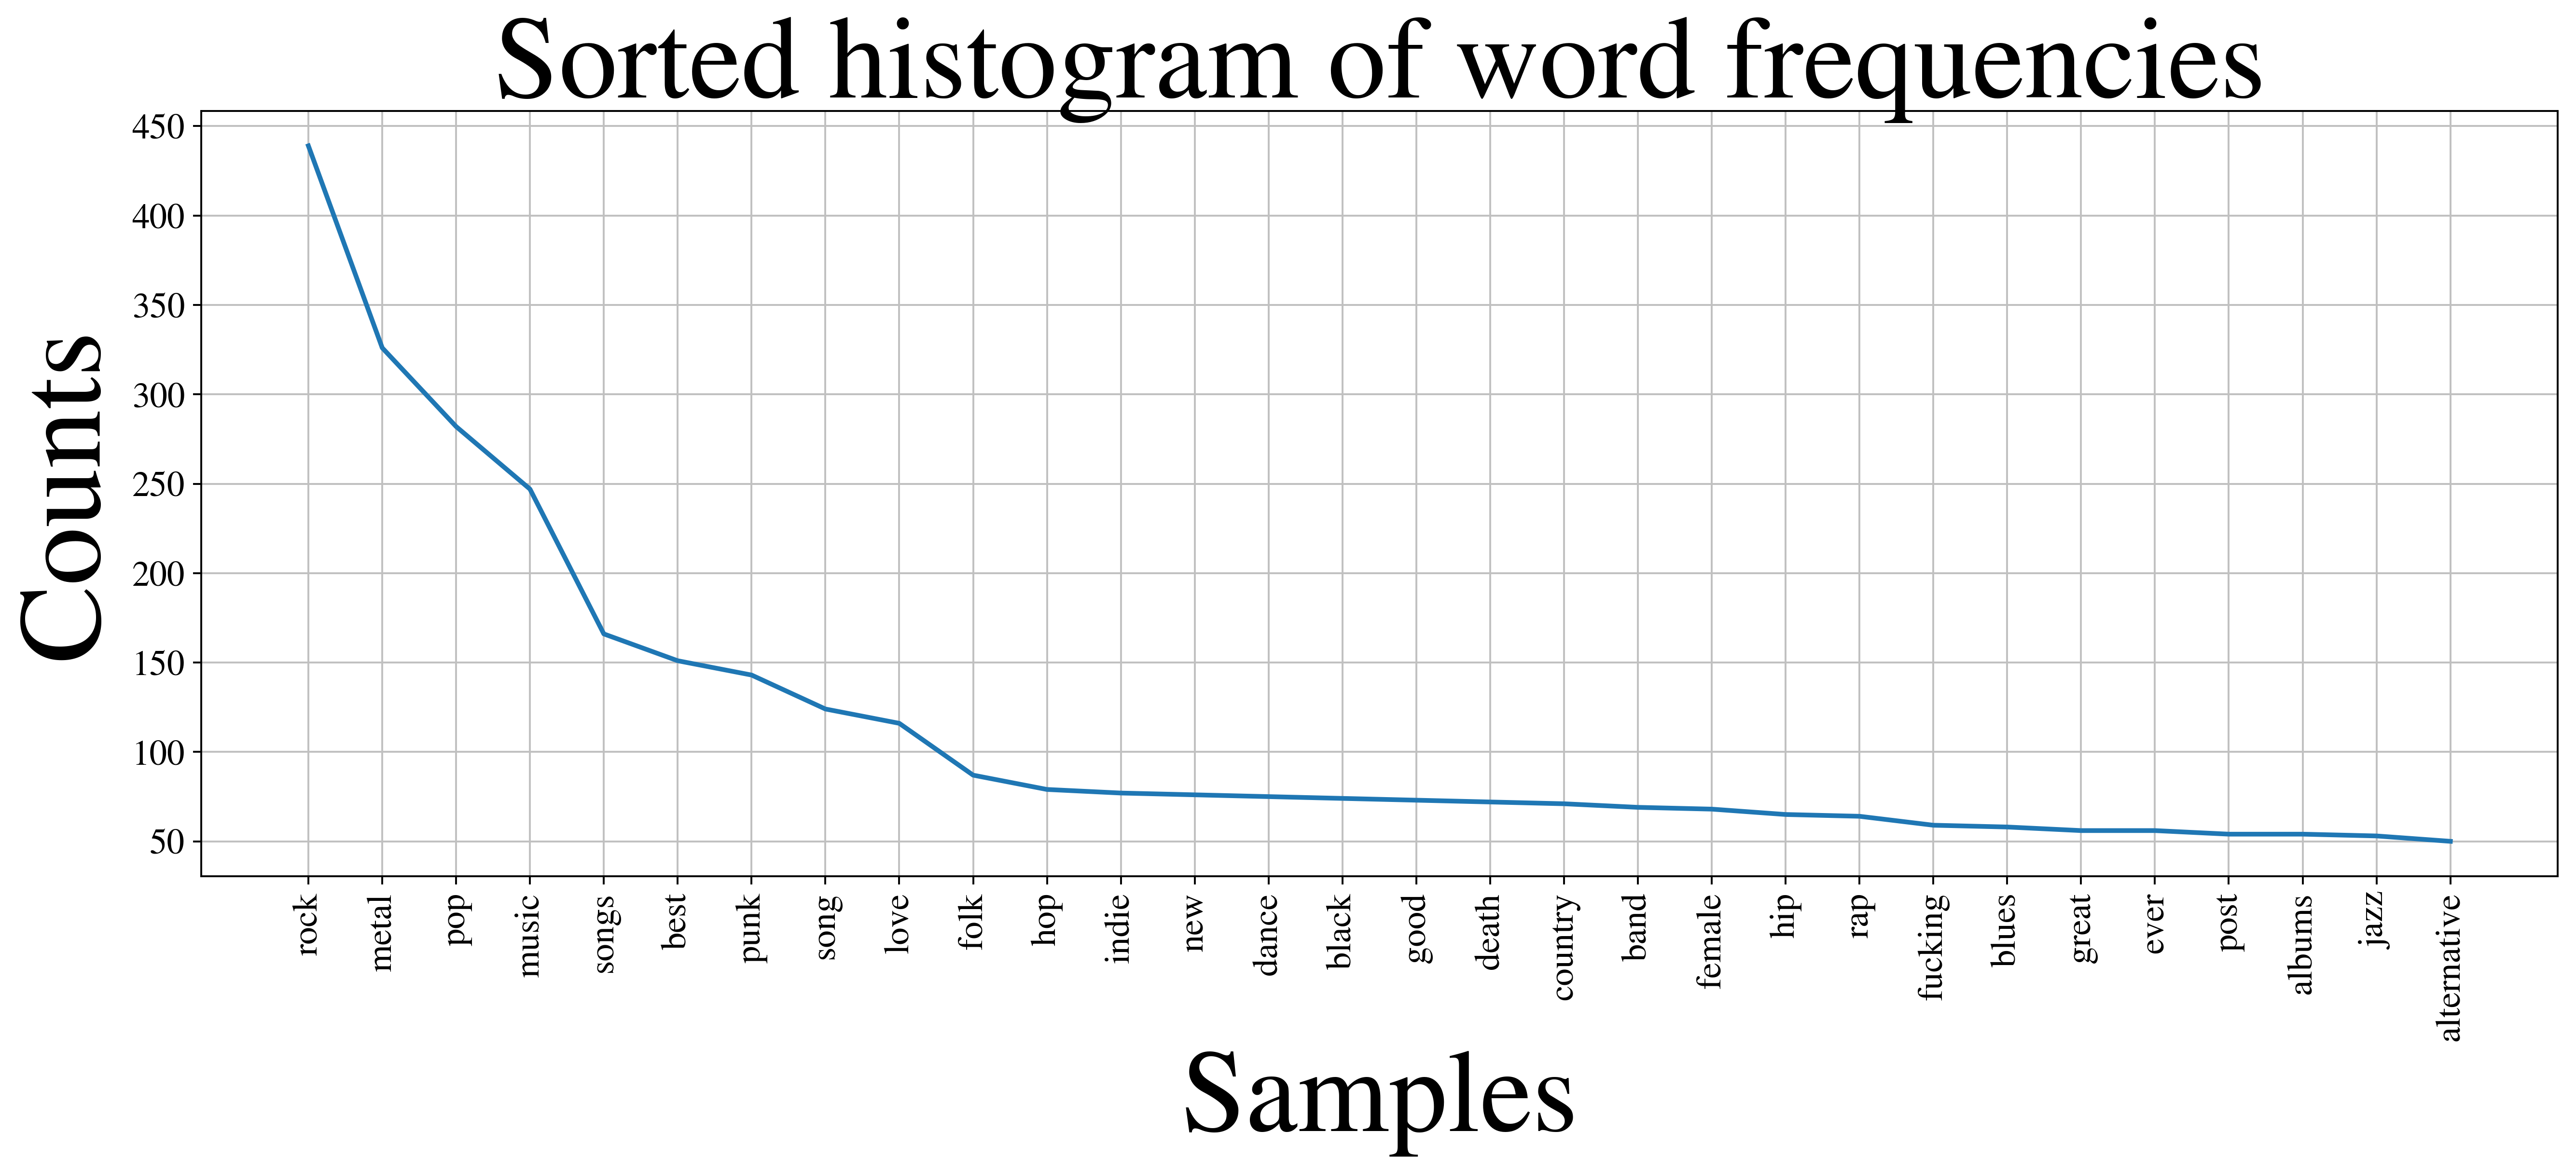

In [3]:
#read tags.dat file, use natural language processing to sort word frequencies in all tags.
df_tags = pd.read_csv('./music/MusicInfo/tags.dat', sep='\t') 
print len(df_tags)
print df_tags.head()
print type(df_tags.tagID[0])
all_tags = df_tags.tagValue.str.rstrip().to_string(header=False, index=False).replace('\n',',')

tokenizer = RegexpTokenizer('\w+')
tokenized_tags = tokenizer.tokenize(all_tags)
stopwords = nltk.corpus.stopwords.words('english')
cleared_tokenized_tags = [word for word in tokenized_tags if word.lower() not in stopwords]
cleared_text_tags = nltk.Text(cleared_tokenized_tags)

f = plt.figure( figsize=(18, 6))
plt.xlabel('Words', size=50)
plt.ylabel('Counts', size=50)
plt.title('Sorted histogram of word frequencies', size=50)
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
cleared_text_tags.plot(30)
ax = f.get_axes()

In [4]:
#from above figure, select below 8 most popular music style
#0:'rock',1:'metal',2:'pop',3:'punk',4:'folk',5:'hop',6:'black',7:'country'
want_music_styles = ['rock','metal','pop','punk','folk','hop','black','country']
want_tags = pd.DataFrame()
want_tags['styleID'] = ''
want_tags['style'] = ''
for i in range(0, len(want_music_styles)):
    want_tags = want_tags.append(df_tags[df_tags['tagValue'].str.contains(want_music_styles[i])],ignore_index=True)
want_tags.tagID=want_tags.tagID.astype(int)

for j in range(0, len(want_tags)):
    for k in range(0, len(want_music_styles)):
        if want_tags.iloc[j]['tagValue'].find(want_music_styles[k]) > -1:
            want_tags.loc[j, 'styleID'] = k
            want_tags.loc[j, 'style'] = want_music_styles[k]
        
print len(want_tags)
want_tags.head()

C:\Users\winnie\Anaconda2\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


1768


,style,styleID,tagID,tagValue
0,rock,0,3,goth rock
1,rock,0,72,hard rock
2,rock,0,73,rock
3,rock,0,75,psychedelic rock
4,rock,0,77,ambient rock


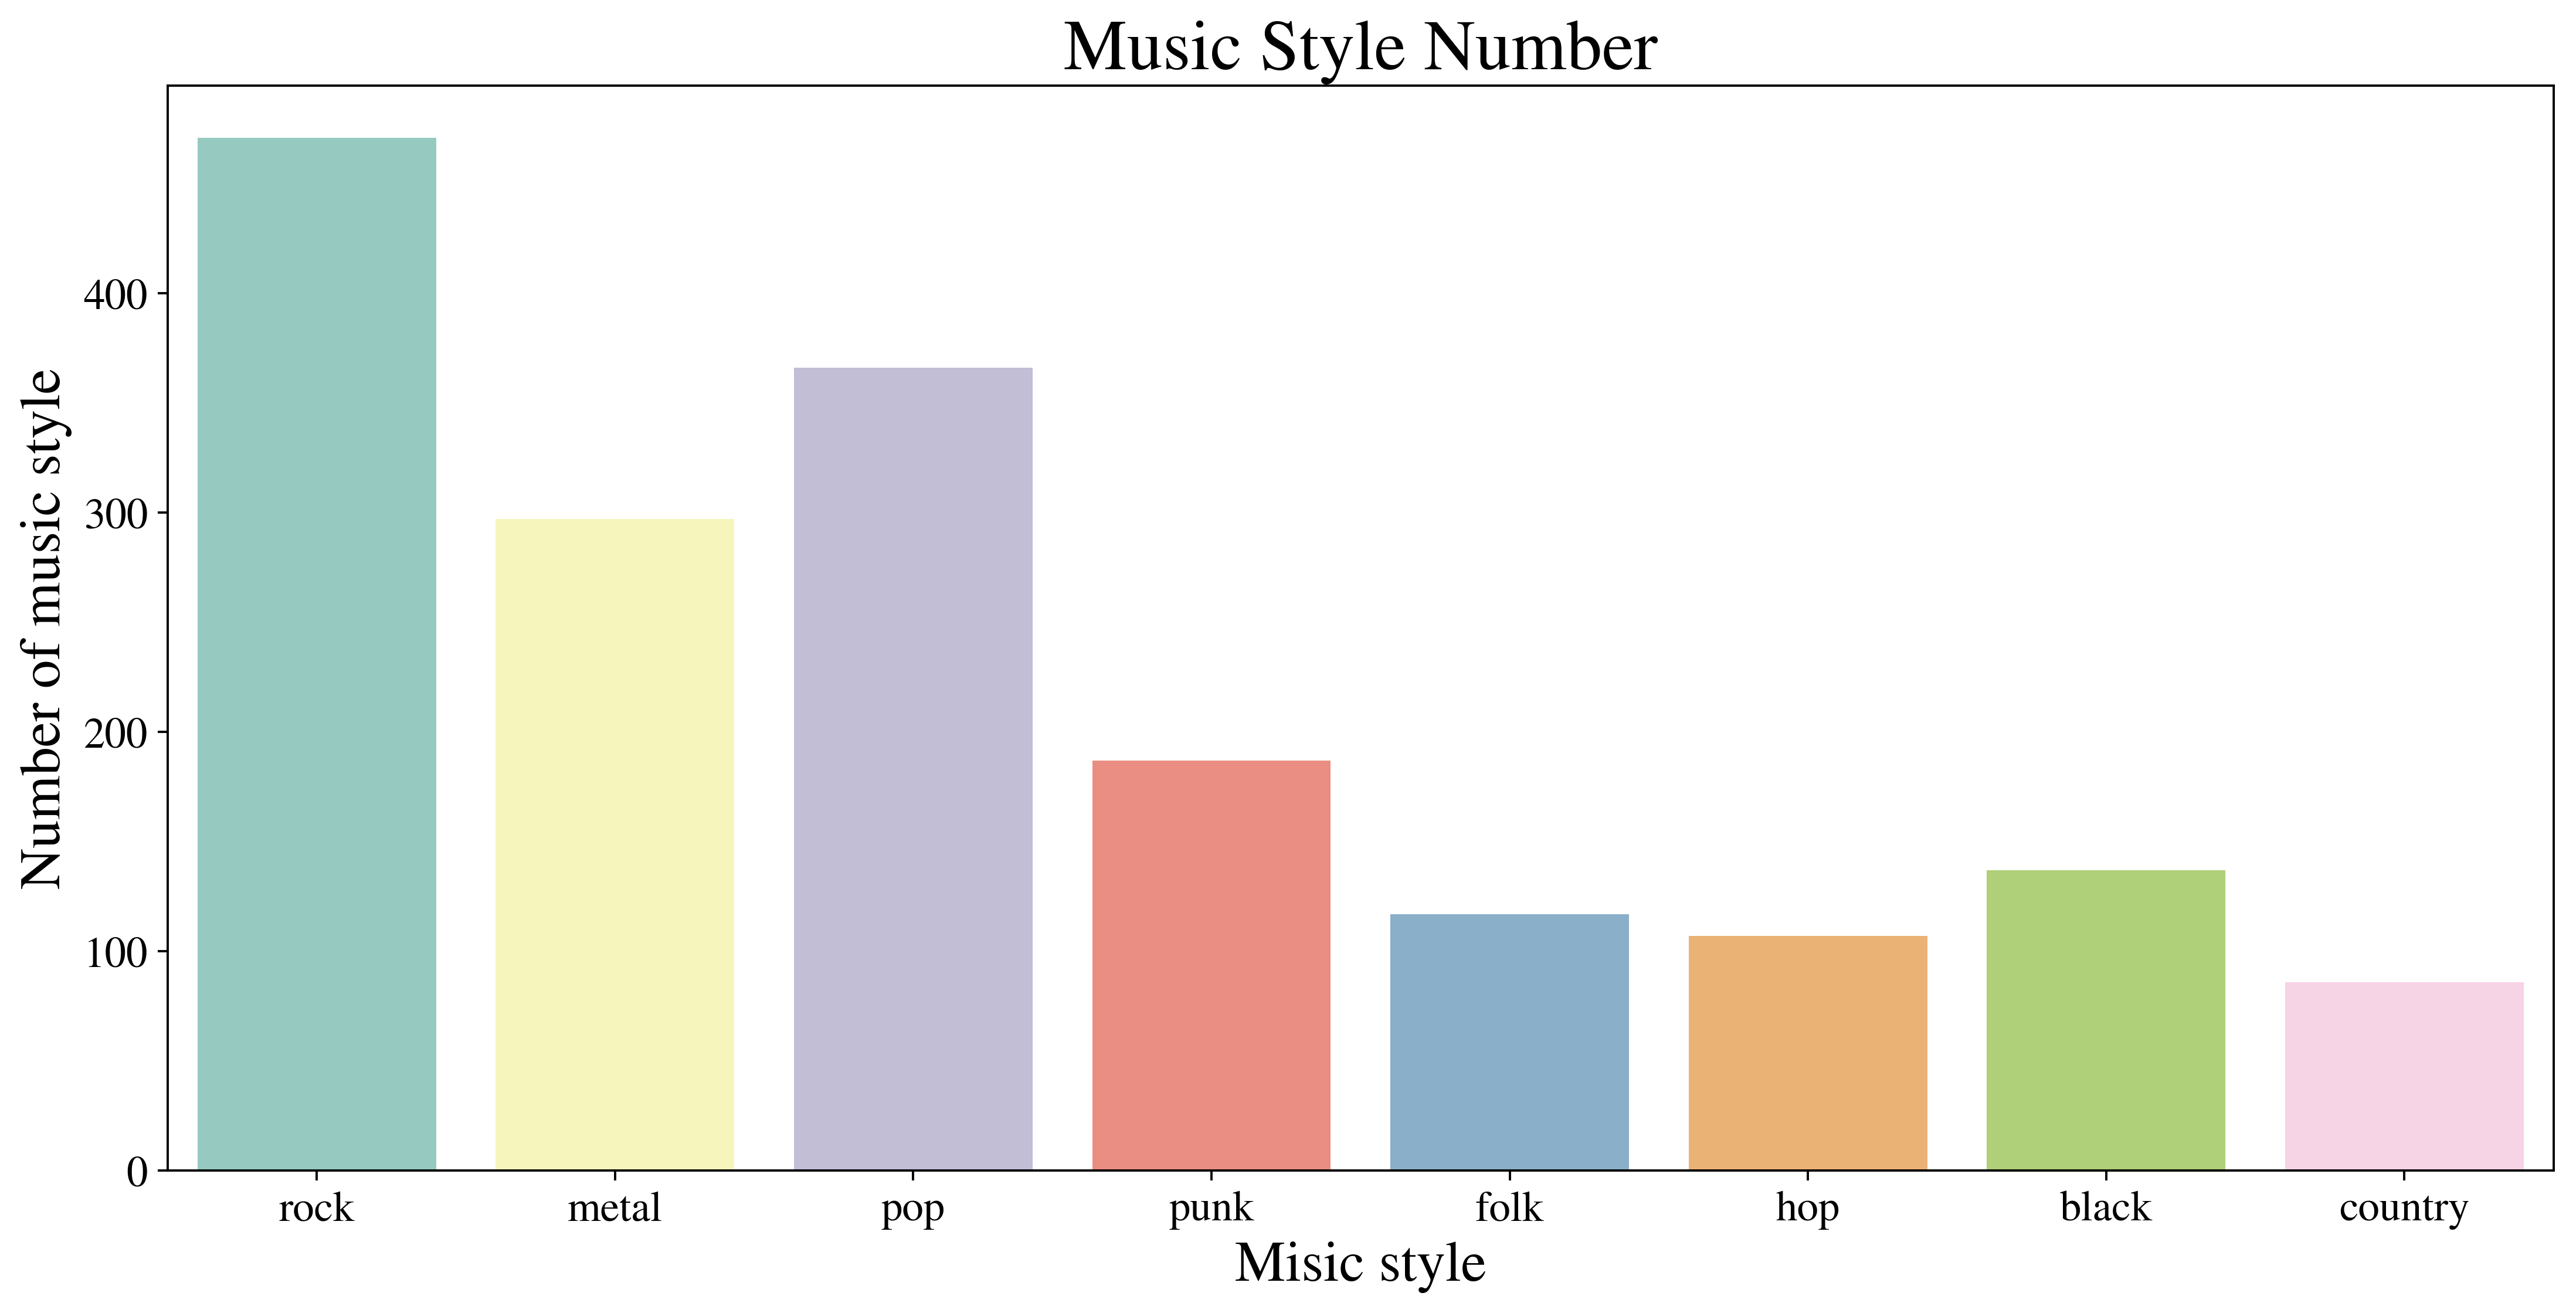

In [5]:
import seaborn as sns
music_mapping = ['rock','metal','pop','punk','folk','hop','black','country']
plt.figure(figsize = (15,7))
sns.countplot(x='styleID', data=want_tags , palette="Set3")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], music_mapping)
plt.xlabel('Misic style', fontsize=20)
plt.ylabel('Number of music style', fontsize=20)
plt.title("Music Style Number", fontsize = 25)
plt.show()

We can see from this chart that the amount of each genre of the music. We can see the total of the rock songs are the most popular and country songs are the least. 

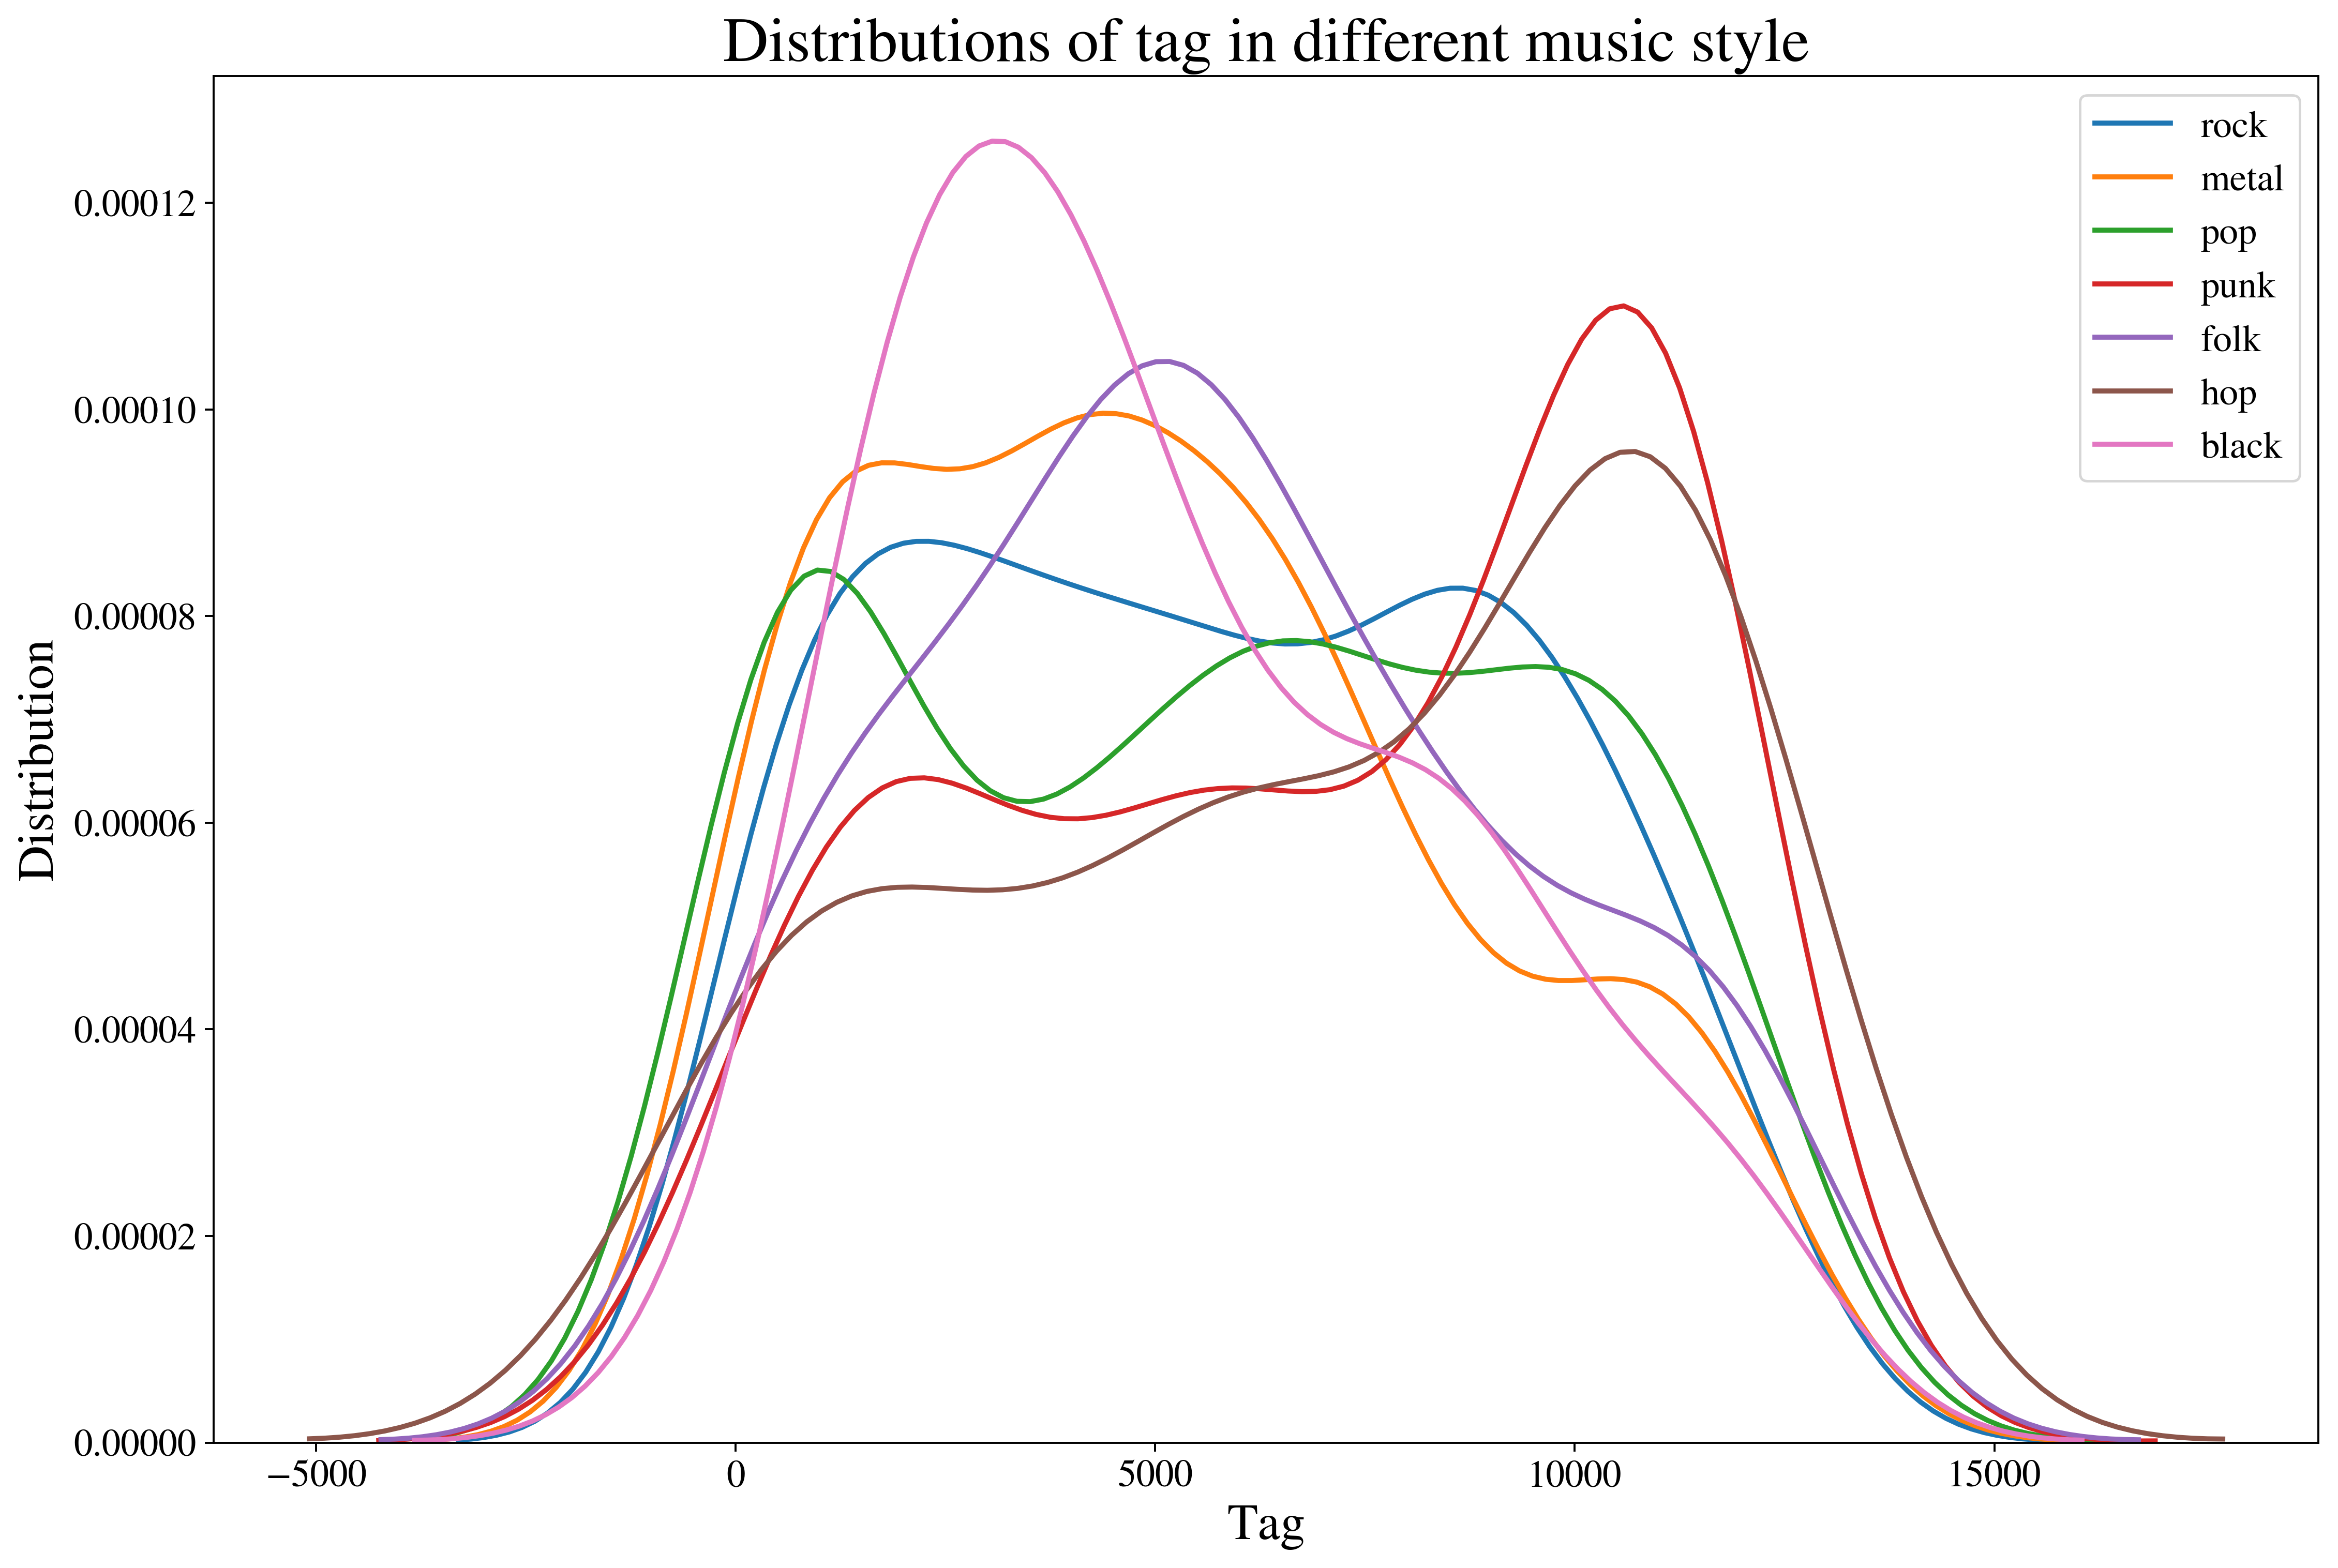

In [6]:
for i in range(0,7):
    sns.kdeplot(want_tags.loc[want_tags['styleID']==i, 'tagID'],label = music_mapping[i])
plt.title('Distributions of tag in different music style', size=25)
plt.xlabel('Tag', size=20)
plt.ylabel('Distribution', size=20)
plt.legend()
plt.show()

The distribution chart can be seen from above is about all the distribution are close to 0.00006 to 0.00010 and amount by tag from 1,000 to 10,000

In [7]:
#read user_taggedartists.dat
df_user_tagged_artists = pd.read_csv('./music/MusicInfo/user_taggedartists.dat', sep='\t') 
print df_user_tagged_artists.head()

#join the dataframe[df_user_tagged_artists] and [want_tags] on key [tagID]
#drop rows which are not the 8 most popular music styles.
df_artist_with_want_style = df_user_tagged_artists.join(want_tags.set_index('tagID'), how='left', on='tagID')
df_artist_with_want_style.dropna(inplace=True)
df_artist_with_want_style.drop(columns=['day','month','year','userID','tagID','tagValue'],inplace=True)
df_artist_with_want_style.styleID = df_artist_with_want_style.styleID.astype(int)
df_artist_with_want_style.drop_duplicates(subset=['artistID'], inplace=True)
print len(df_artist_with_want_style)
df_artist_with_want_style.head()

   userID  artistID  tagID  day  month  year
0       2        52     13    1      4  2009
1       2        52     15    1      4  2009
2       2        52     18    1      4  2009
3       2        52     21    1      4  2009
4       2        52     41    1      4  2009
8085


,artistID,style,styleID
3,52,hop,5
14,73,hop,5
20,94,hop,5
26,96,pop,2
28,995,pop,2


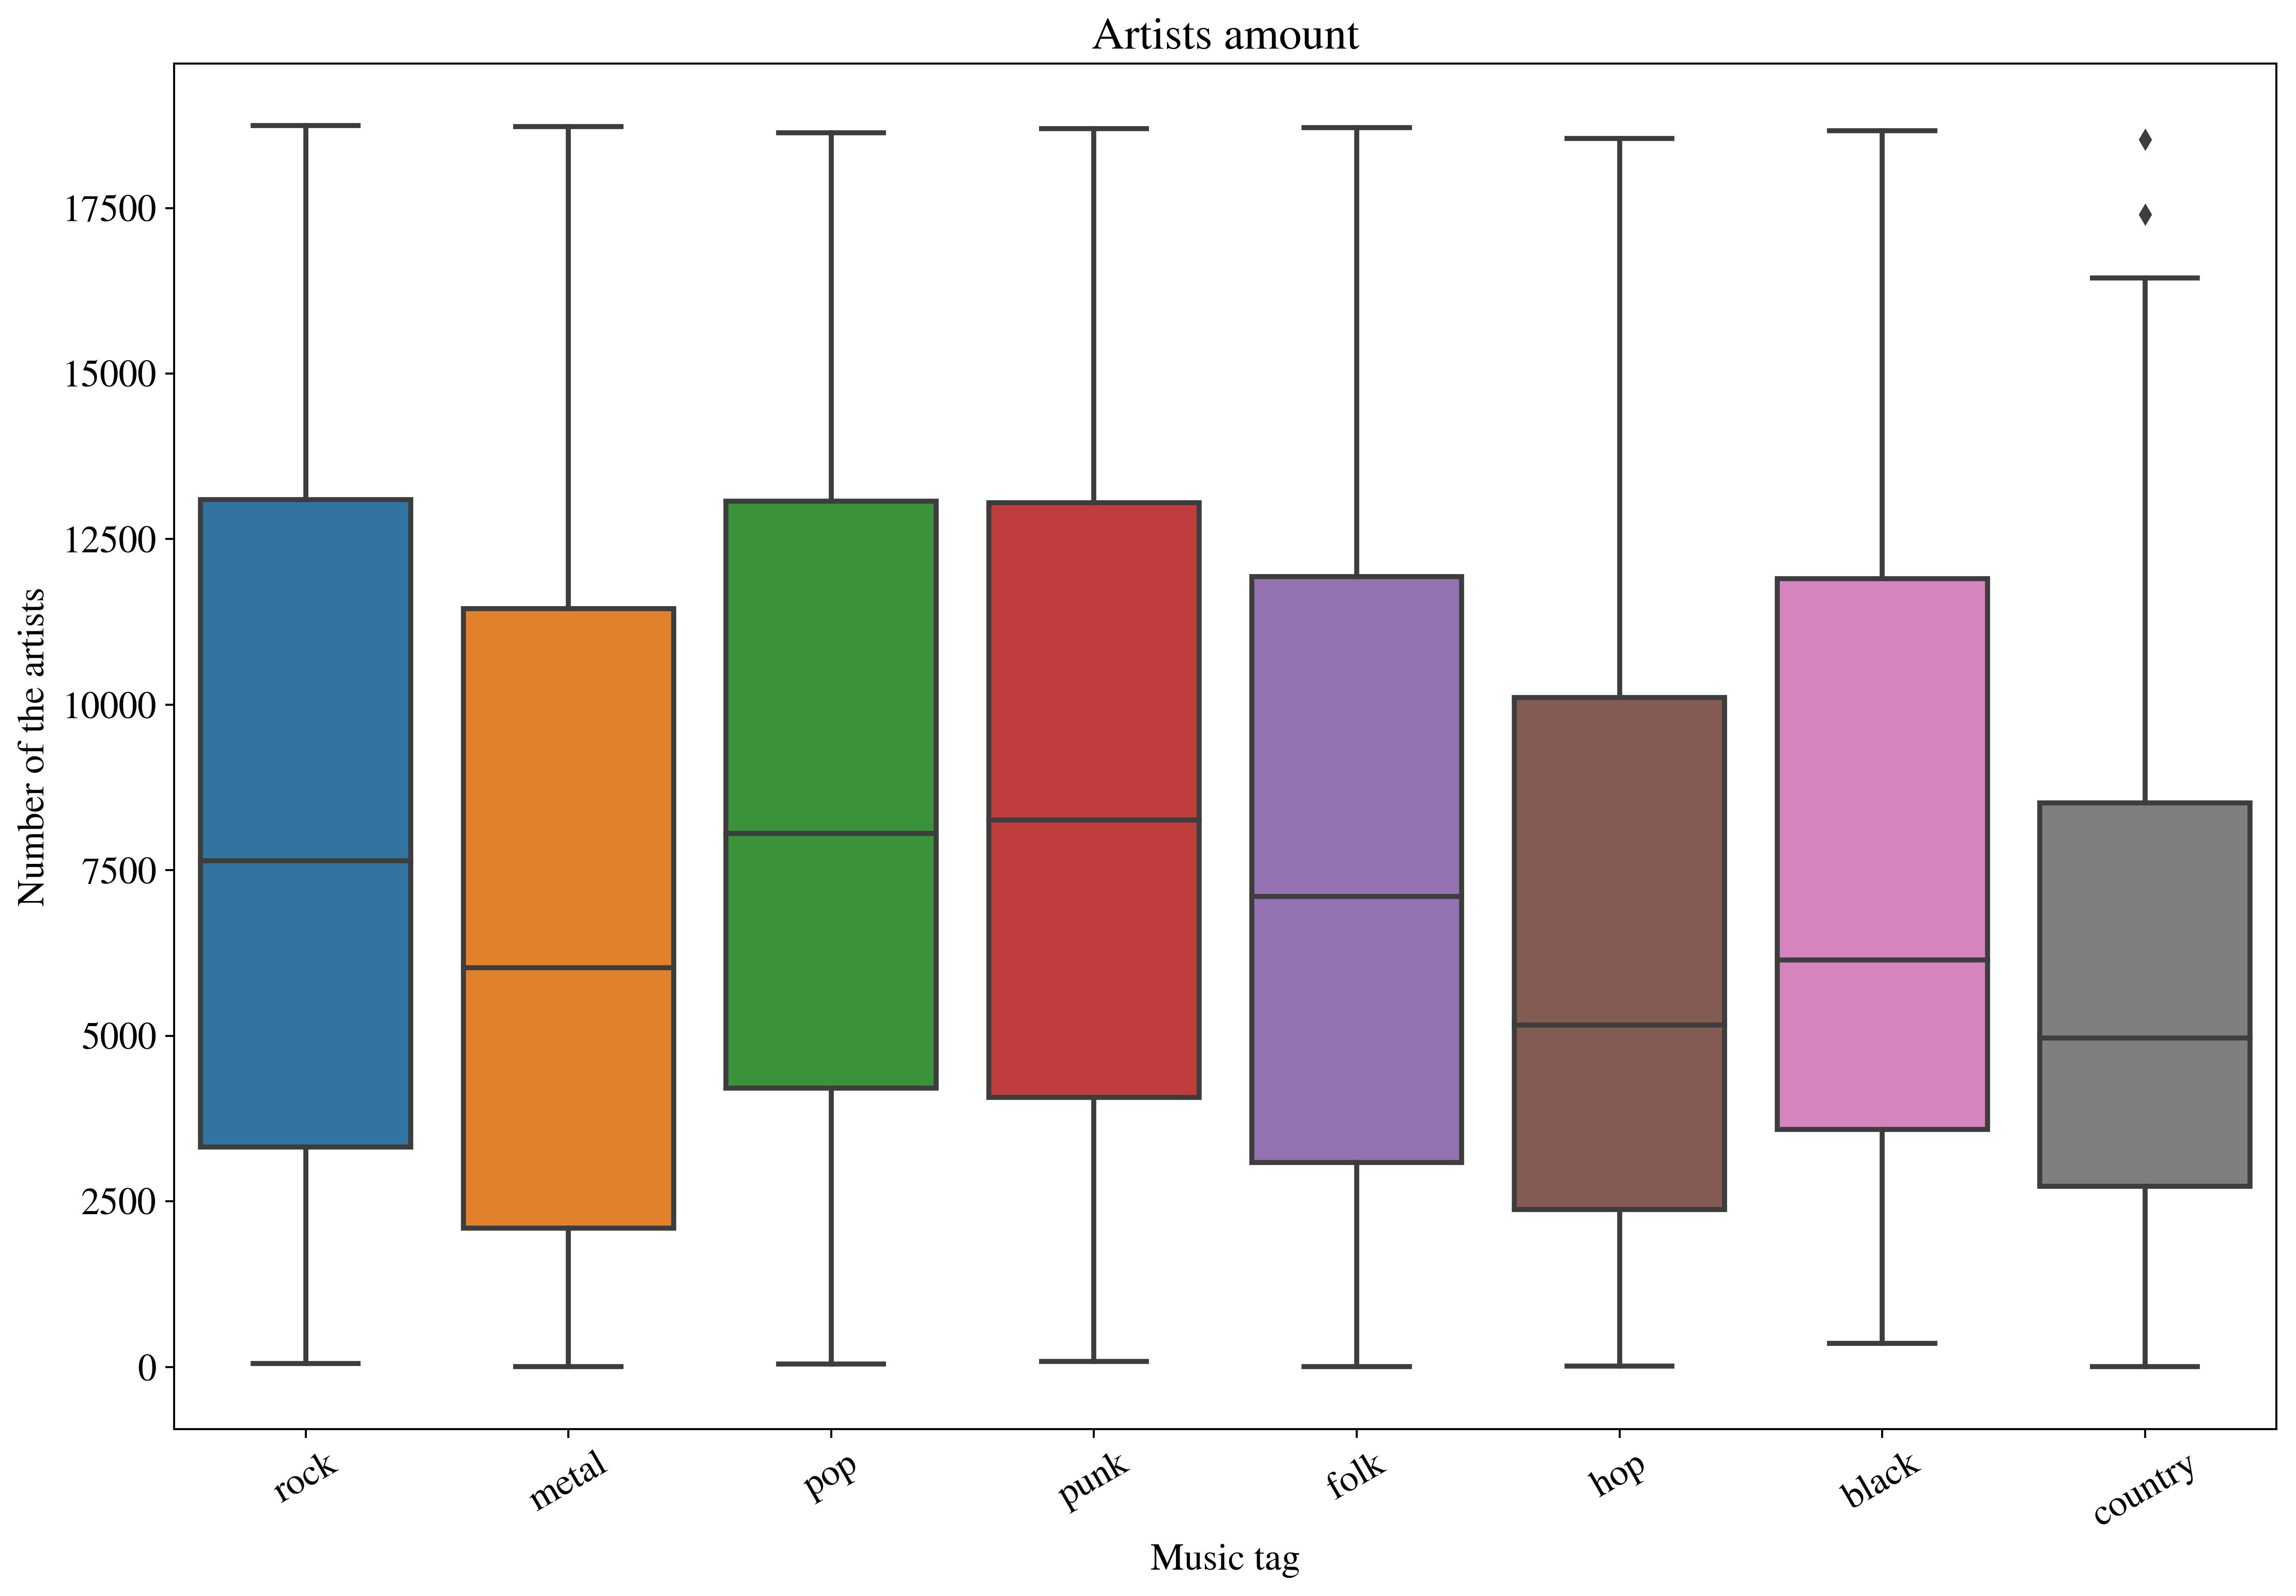

In [8]:
sns.boxplot(x = 'style', y = 'artistID', data = df_artist_with_want_style)
plt.title('Artists amount')
plt.ylabel('Number of the artists')
plt.xticks([0,1,2,3,4,5,6,7], music_mapping,rotation=30)
plt.xlabel('Music tag')
plt.show()

The boxplot shows that the artists of each genre music amount section. We can see the largest and smallest number and the mean value. 

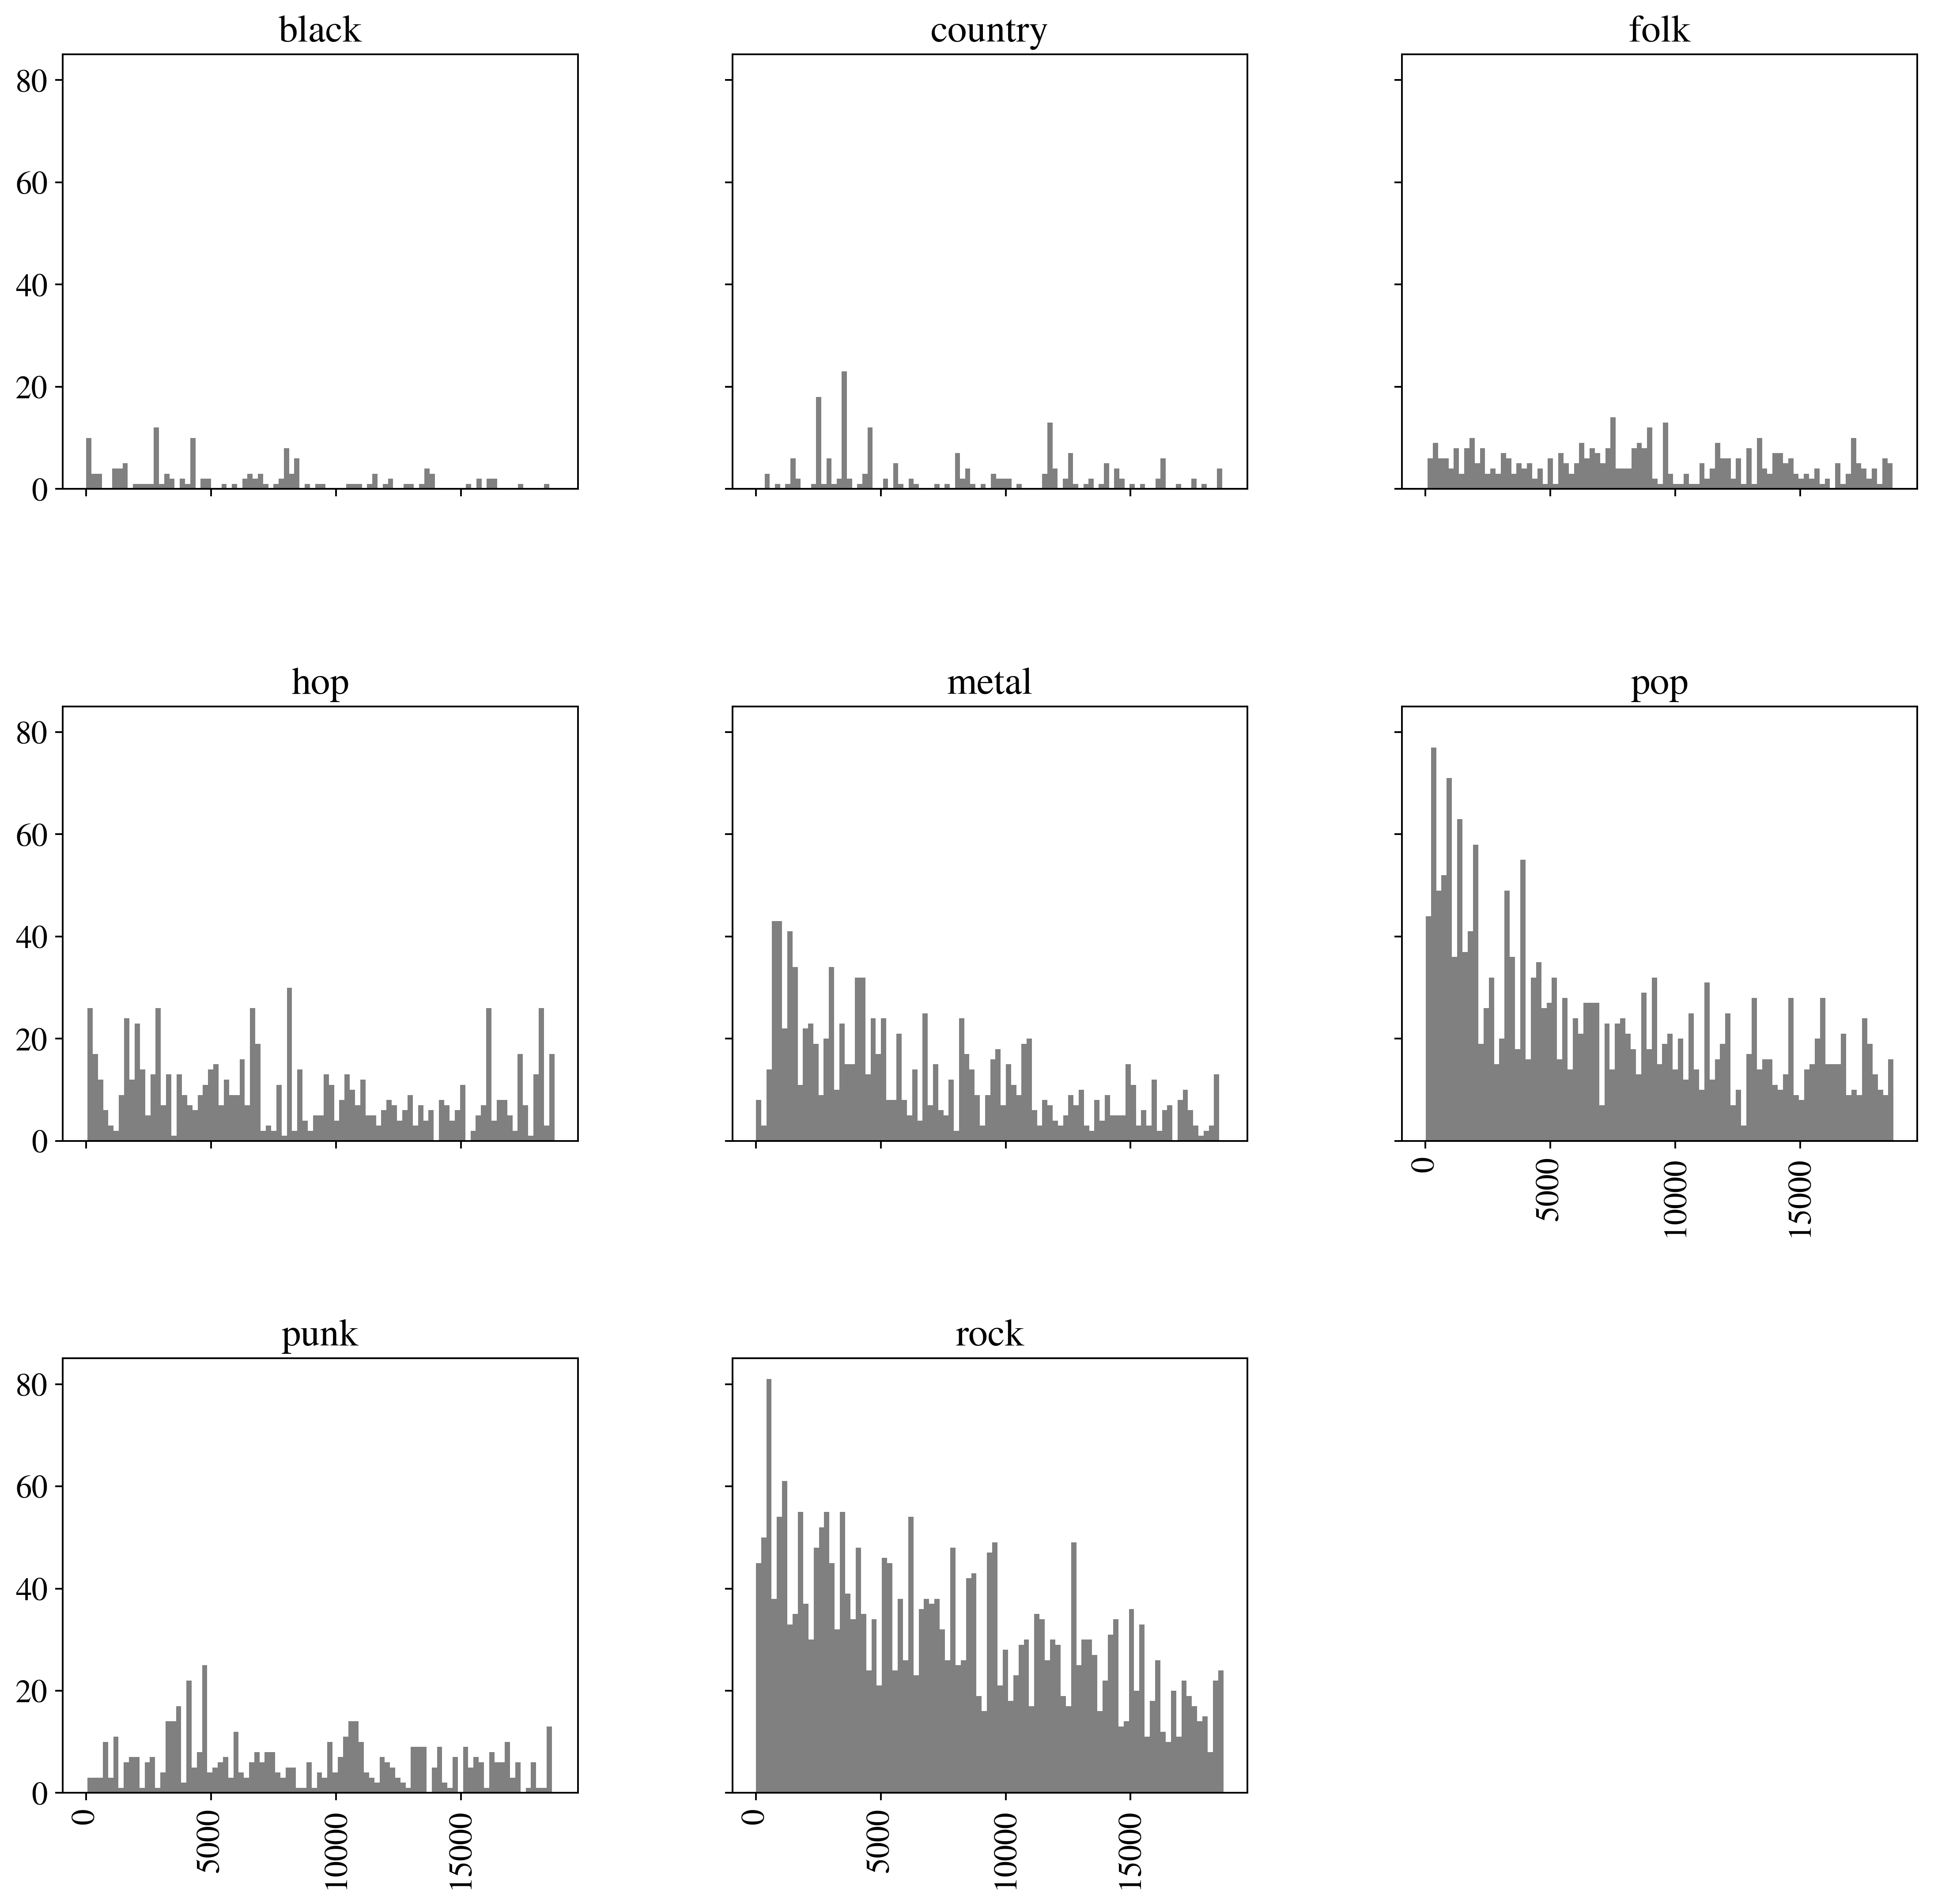

In [9]:
_ = df_artist_with_want_style['artistID'].hist(by=df_artist_with_want_style['style'], figsize=(15, 15), sharey=True,
                                               sharex=True, bins=int(np.sqrt(len(df_artist_with_want_style))), color='grey')

From the histogram, we can see the rock and pop music genre are most popular. They are almost 4 to 8 times than other music genres.